In [1]:
import tweepy
from tweepy import OAuthHandler
from wordcloud import WordCloud
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
consumer_key='XXXXXXXXXXXXXXXXXXXXXconsumer_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
access_token_secret='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'


In [3]:
try: 
      auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
      auth.set_access_token(access_token, access_token_secret)
      api = tweepy.API(auth,wait_on_rate_limit=True)
except:
       print("Error: Authentication failed")

In [4]:
#Extract 100 tweets of 5 news channel
ndtv= api.user_timeline(screen_name="ndtv",count=100,lang="en",tweet_mode="extended")
TimesNow= api.user_timeline(screen_name="TimesNow",count=100,lang="en",tweet_mode="extended")
republic= api.user_timeline(screen_name="republic",count=100,lang="en",tweet_mode="extended")
ZeeNewsEnglish= api.user_timeline(screen_name="ZeeNewsEnglish",count=100,lang="en",tweet_mode="extended")
CNN= api.user_timeline(screen_name="CNN",count=100,lang="en",tweet_mode="extended")
#print
print('show tweets \n')
i=1
for tweet in ndtv[0:100]:
    print(str(i)+" "+tweet.full_text+'\n')
    i=i+1

show tweets 

1 RT @ndtvfeed: Around 8.72 Lakh Vacant Posts In Central Government Departments: Minister https://t.co/1NlRbmgNBw https://t.co/8PMPI916x0

2 Top stories now on https://t.co/Fbzw6mR9Q5 

#NDTVTopStories https://t.co/o8hKc2Ki9N

3 RT @ndtvfeed: Pegasus ''Non-Issue'', Ready To Discuss Other Matters: Union Minister https://t.co/7M7bKmOeAZ https://t.co/OhKy5GtXne

4 RT @ndtvfeed: Vaccine-Resistant Variants' Risk More With Jab Coverage? Study Answers https://t.co/nxHK7ZFPQe https://t.co/sgA9wRAl14

5 RT @carandbike: #Volkswagen has revealed the #Taigo compact crossover for the European market. The car will be manufactured at the @VW's pl…

6 RT @carandbike: The #Tata #TiagoNRG facelift, which will go on sale in India next week, has been spotted at a dealership yard ahead of its…

7 RT @Gadgets360: We tried Micromax In 2b, the company's latest entry-level phone in India, and here's what we think about it so far  
https:…

8 #TokyoOlympics https://t.co/7vpnP9xZ8F

9 RT @ndtvfeed:

In [7]:
#Create a Dataframe with a column called tweets
df1=pd.DataFrame([tweet.full_text for tweet in ndtv] , columns=['Tweets'])
df2=pd.DataFrame([tweet.full_text for tweet in TimesNow] , columns=['Tweets'])
df3=pd.DataFrame([tweet.full_text for tweet in republic] , columns=['Tweets'])
df4=pd.DataFrame([tweet.full_text for tweet in ZeeNewsEnglish] , columns=['Tweets'])
df5=pd.DataFrame([tweet.full_text for tweet in CNN] , columns=['Tweets'])

#Show first 5 rows of data
df1.head()

,Tweets
0,RT @ndtvfeed: Around 8.72 Lakh Vacant Posts In...
1,Top stories now on https://t.co/Fbzw6mR9Q5 \n\...
2,"RT @ndtvfeed: Pegasus ''Non-Issue'', Ready To ..."
3,RT @ndtvfeed: Vaccine-Resistant Variants' Risk...
4,RT @carandbike: #Volkswagen has revealed the #...


In [10]:
#Clean the text

#Create a function to clean the tweets
def cleantxt(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
    text=re.sub(r'#', '',text)  #Removing the '#' symbol
    text=re.sub(r'RT[\s]+', '',text)  #removing RT
    text=re.sub(r'https?:\/\/\S+', '', text)  #removing the hyperlink
    
    return text

#Cleaning the text
df1['Tweets']=df1['Tweets'].apply(cleantxt)
df2['Tweets']=df2['Tweets'].apply(cleantxt)
df3['Tweets']=df3['Tweets'].apply(cleantxt)
df4['Tweets']=df4['Tweets'].apply(cleantxt)
df5['Tweets']=df5['Tweets'].apply(cleantxt)

#show the clean text
df1


,Tweets
0,: Around 8.72 Lakh Vacant Posts In Central Gov...
1,Top stories now on \n\nNDTVTopStories
2,": Pegasus ''Non-Issue'', Ready To Discuss Othe..."
3,: Vaccine-Resistant Variants' Risk More With J...
4,: Volkswagen has revealed the Taigo compact cr...
...,...
95,": Decomposed Bodies Of Man, Woman Found In Del..."
96,: Woman Banker Fatally Stabbed By Her Branch's...
97,Many parts of Kolkata waterlogged after heavy ...
98,: Everything you always wanted to know about B...


In [11]:
#Create a function to get the subjectivity

def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity

def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#Create two new columns foe subjectivity and polarity
df1['Subjectivity']=df1['Tweets'].apply(getsubjectivity)
df1['Polarity']=df1['Tweets'].apply(getpolarity)

df2['Subjectivity']=df2['Tweets'].apply(getsubjectivity)
df2['Polarity']=df2['Tweets'].apply(getpolarity)

df3['Subjectivity']=df3['Tweets'].apply(getsubjectivity)
df3['Polarity']=df3['Tweets'].apply(getpolarity)

df4['Subjectivity']=df4['Tweets'].apply(getsubjectivity)
df4['Polarity']=df4['Tweets'].apply(getpolarity)

df5['Subjectivity']=df5['Tweets'].apply(getsubjectivity)
df5['Polarity']=df5['Tweets'].apply(getpolarity)

#Show 2 new columns
df1

,Tweets,Subjectivity,Polarity
0,: Around 8.72 Lakh Vacant Posts In Central Gov...,0.2500,0.0000
1,Top stories now on \n\nNDTVTopStories,0.5000,0.5000
2,": Pegasus ''Non-Issue'', Ready To Discuss Othe...",0.4375,0.0375
3,: Vaccine-Resistant Variants' Risk More With J...,0.5000,0.5000
4,: Volkswagen has revealed the Taigo compact cr...,0.0000,0.0000
...,...,...,...
95,": Decomposed Bodies Of Man, Woman Found In Del...",0.0000,0.0000
96,: Woman Banker Fatally Stabbed By Her Branch's...,0.0000,0.0000
97,Many parts of Kolkata waterlogged after heavy ...,0.5000,0.1500
98,: Everything you always wanted to know about B...,0.3750,-0.1250


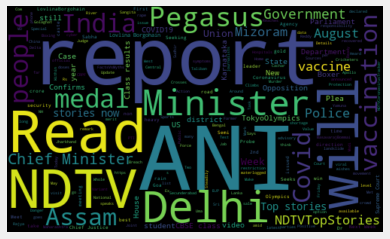

In [13]:
#plot the wordcloud

allwords=' '.join( [twts for twts in df1['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

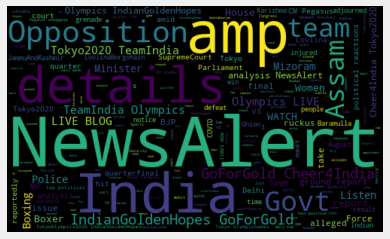

In [14]:
#plot the wordcloud

allwords=' '.join( [twts for twts in df2['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

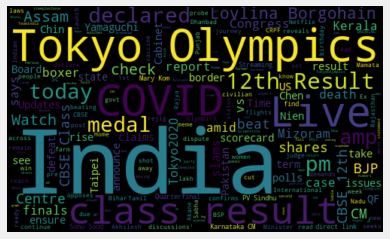

In [15]:
#plot the wordcloud

allwords=' '.join( [twts for twts in df3['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

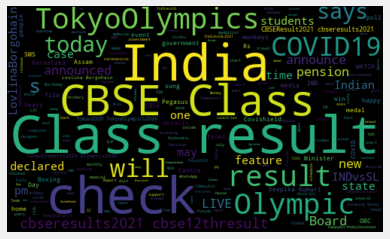

In [16]:
#plot the wordcloud

allwords=' '.join( [twts for twts in df4['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

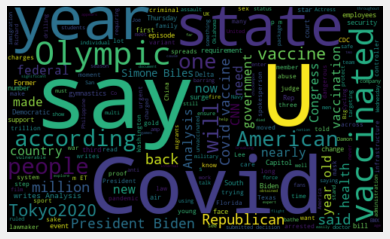

In [17]:
#plot the wordcloud

allwords=' '.join( [twts for twts in df5['Tweets']] )
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [19]:
#Create a function to compute the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis']=df1['Polarity'].apply(getanalysis)

#Show the dataframe
df1

,Tweets,Subjectivity,Polarity,Analysis
0,: Around 8.72 Lakh Vacant Posts In Central Gov...,0.2500,0.0000,Neutral
1,Top stories now on \n\nNDTVTopStories,0.5000,0.5000,Positive
2,": Pegasus ''Non-Issue'', Ready To Discuss Othe...",0.4375,0.0375,Positive
3,: Vaccine-Resistant Variants' Risk More With J...,0.5000,0.5000,Positive
4,: Volkswagen has revealed the Taigo compact cr...,0.0000,0.0000,Neutral
...,...,...,...,...
95,": Decomposed Bodies Of Man, Woman Found In Del...",0.0000,0.0000,Neutral
96,: Woman Banker Fatally Stabbed By Her Branch's...,0.0000,0.0000,Neutral
97,Many parts of Kolkata waterlogged after heavy ...,0.5000,0.1500,Positive
98,: Everything you always wanted to know about B...,0.3750,-0.1250,Negative


In [20]:
#Create a function to compute the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df2['Analysis']=df2['Polarity'].apply(getanalysis)

#Show the dataframe
df2

,Tweets,Subjectivity,Polarity,Analysis
0,NewsUpdate | Ace shuttler beats Japan's Aka...,0.000000,0.000000,Neutral
1,NewsUpdate | Terrorists lobbed a grenade on a ...,0.900000,0.500000,Positive
2,NewsUpdate | Union Sports Minister congratul...,0.000000,0.000000,Neutral
3,NewsAlert | Rajasthan: Farmers protesting agai...,0.100000,-0.100000,Negative
4,NewsAlert | Ace shuttler wins quarterfinals a...,0.200000,0.300000,Positive
...,...,...,...,...
95,: Tokyo2020 TeamIndia Olympics\n\nLIVE BLOG | ...,0.416667,0.193182,Positive
96,: EXPLAINED: Why Mary Kom cannot protest again...,0.950000,0.550000,Positive
97,": TokyoOlympics Tokyo2020\n\nWell done, Lovlin...",0.000000,0.000000,Neutral
98,: Tokyo2020 TeamIndia Olympics\n\nLIVE BLOG | ...,0.833333,0.045455,Positive


In [21]:
#Create a function to compute the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df3['Analysis']=df3['Polarity'].apply(getanalysis)

#Show the dataframe
df3

,Tweets,Subjectivity,Polarity,Analysis
0,International flights to remain suspended till...,0.500,0.000000,Neutral
1,CAG report reveals only 3% got jobs under MNRE...,1.000,0.000000,Neutral
2,PV Sindhu beats Akane Yamaguchi to reach SF in...,0.400,0.800000,Positive
3,LIVE | PV Sindhu advances to semi-finals after...,0.625,0.318182,Positive
4,JAC 12th Result 2021: Jharkhand Board to decla...,0.000,0.000000,Neutral
...,...,...,...,...
95,Assam-Mizoram border dispute: CRPF DIG says 'M...,0.000,0.000000,Neutral
96,Lovlina Borgohain vs Chen Nien-chin Live Strea...,0.500,0.136364,Positive
97,Deepika Kumari vs Perova Live Streaming: How t...,0.500,0.136364,Positive
98,Avinash Sable's 3000m steeplechase Live Stream...,0.500,0.136364,Positive


In [22]:
#Create a function to compute the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df4['Analysis']=df4['Polarity'].apply(getanalysis)

#Show the dataframe
df4

,Tweets,Subjectivity,Polarity,Analysis
0,TokyoOlympics: PV Sindhu blazes into semifinal...,0.40000,0.80000,Positive
1,All India Quota: What does Centre's quota anno...,0.34375,-0.15625,Negative
2,CBSE class 12 results 2021 announced: 12.97 la...,0.00000,0.00000,Neutral
3,"CBSE Class 12: Results of over 65,000 students...",0.00000,0.00000,Neutral
4,JAC Class 12 results 2021: Jharkhand Board to ...,0.00000,0.00000,Neutral
...,...,...,...,...
95,IMD predicts heavy rainfall in 15 districts of...,0.50000,-0.20000,Negative
96,"SanjuSamson is memers' favourite boy, check ou...",1.00000,0.25000,Positive
97,HarbhajanSingh tells unique tales involving MS...,1.00000,0.37500,Positive
98,"Seized COVID19 vaccine vials not Covishield, S...",0.00000,0.00000,Neutral


In [23]:
#Create a function to compute the negative, neutral and positive analysis

def getanalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df5['Analysis']=df5['Polarity'].apply(getanalysis)

#Show the dataframe
df5

,Tweets,Subjectivity,Polarity,Analysis
0,Goldman Sachs is barring employees from using ...,0.000000,0.000000,Neutral
1,A tiny landlocked European country surrounded ...,0.456667,0.250000,Positive
2,The US and China say they want to avoid milita...,0.100000,-0.100000,Negative
3,"Former Olympic champion Connor Fields ""is awak...",0.180000,-0.040000,Negative
4,The Philippines is restoring a military agreem...,0.100000,-0.100000,Negative
...,...,...,...,...
95,Israel's health care system has been told to m...,0.500000,0.000000,Neutral
96,"""I came with my daughter and I'm not going any...",0.000000,0.000000,Neutral
97,"""The ruthless killing of Afghan interpreter So...",0.588889,-0.188889,Negative
98,As Covid-19 cases rise due to the Delta varian...,0.375000,-0.125000,Negative


In [29]:
#Print all the positive Tweets
j=1
sorteddf1=df1.sort_values(by=['Polarity'])
for i in range(0, sorteddf1.shape[0]):
    if(sorteddf1['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sorteddf1['Tweets'][i])
        print()
        j=j+1

1) Top stories now on  

NDTVTopStories 

2) : Pegasus ''Non-Issue'', Ready To Discuss Other Matters: Union Minister  

3) : Vaccine-Resistant Variants' Risk More With Jab Coverage? Study Answers  

4) : We tried Micromax In 2b, the company's latest entry-level phone in India, and here's what we think about it so far  
https:…

5) "It is important to enumerate caste-wise data in Census other than the SC and ST": RJD leader Tejashwi Yadav () in Patna 

6) : On Friday, celebrity hairstylist Aalim Hakim took to Instagram to share MSDhoni's new "dashing look"



7) Restrictions on scheduled international passenger flights to/from India extended till August 31st, 2021: Directorate General of Civil Aviation (DGCA)

COVID19 

8) "Met the Chief Minister of Karnataka BasavarajBommai. My best wishes to him and his team in taking the state to newer heights," tweets Union Home Minister Amit Shah 

9) : Rajya Sabha Chairman Shreds MPs For Whistling In House, Warns Of Action  

10) Breaking | CBSE C

In [30]:
#Print all the positive Tweets
j=1
sorteddf2=df2.sort_values(by=['Polarity'])
for i in range(0, sorteddf2.shape[0]):
    if(sorteddf2['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sorteddf2['Tweets'][i])
        print()
        j=j+1

1) NewsUpdate | Terrorists lobbed a grenade on a joint team of Security Forces in Baramulla. 4 jawans injured.

Sohil Sehran with the latest. 

2) NewsAlert | Ace shuttler  wins quarterfinals at TokyoOlympics2020. | IndianGoldenHopes GoForGold Cheer4India 

3) : It was also Europe's best selling electric car last month

Tesla Model3 TeslaModel3  

4) : Tokyo2020 TokyoOlympics2020 

PVSindhu vs AkaneYamaguchi quarterfinals LIVE: PV Sindhu wins opening game 21-13

Fol…

5) : Tokyo2020 TeamIndia Olympics

LIVE BLOG | We are moments away from PV Sindhu vs Akane Yamaguchi match to begin!

htt…

6) : Tokyo2020 

PVSindhu vs AkaneYamaguchi quarterfinals LIVE: The rivalry resumes at TokyoOlympics2020

Follow live up…

7) : Tokyo2020 TeamIndia Olympics

LIVE BLOG | All eyes on PV Sindhu who takes on Akane Yamaguchi for a place in Women's…

8) : Will RahulDravid succeed  as India's full-time coach? The Wall sheds light on his future



9) Could India have its own digital currency? The RBI has be

In [31]:
#Print all the positive Tweets
j=1
sorteddf3=df3.sort_values(by=['Polarity'])
for i in range(0, sorteddf3.shape[0]):
    if(sorteddf3['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sorteddf3['Tweets'][i])
        print()
        j=j+1

1) PV Sindhu beats Akane Yamaguchi to reach SF in Tokyo Olympics, a win away to ensure medal 

2) LIVE | PV Sindhu advances to semi-finals after beating Japan's Akane Yamaguchi, a step away from winning a medal for India.

Watch here -  

3) Odisha: Fed up with govt laxity Kuturakend villagers begin building bridge on their own 

4) Pralhad Joshi slams Opp'n for disrupting Parliament, says 'Centre ready for discussions' 

5) CBSE 12th Result 2021 Live Updates: CBSE class 12 results declared, see direct links here



6) CBSE 12th result 2021 declared, here are the direct links to check scorecard 

7) Over 9 lakh children suffer severely acute malnutrition, states Centre; 3.98 lakh from UP 

8) Tokyo Olympics: India women’s hockey team defeats Ireland 1-0, stays alive in QF race 

9) COVID-19: India reports 44,230 new infections &amp; 555 deaths; active cases rise to 4,05,155 

10) 'Many Ministers ready to resign': Congress confirms Rajasthan Cabinet rejig post resentment 

11) India vs 

In [32]:
#Print all the positive Tweets
j=1
sorteddf4=df4.sort_values(by=['Polarity'])
for i in range(0, sorteddf4.shape[0]):
    if(sorteddf4['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sorteddf4['Tweets'][i])
        print()
        j=j+1

1) TokyoOlympics: PV Sindhu blazes into semifinals, one win away from medal

 PVSindhu 


2) TokyoOlympics: Sprinter Dutee Chand makes an early exit, Avinash Sable misses steeplechase final

 AvinashSable DuteeChand  


3) Bajaj Pulsar250F spied testing, several prominent features revealed – In pics

BajajPulsar Pulsar


4) CBSE class 12th result 2021 LIVE updates: Here’s everything you need to know

cbseresults2021 cbse12thresult  


5) Meet LovlinaBorgohain, India's latest boxing sensation

Olympics Tokyo2020 TokyoOlympics2020 Olympics2020 Boxing 



6) CBSE announces Class 12 result date with a hilarious tweet, sparks meme fest

cbseresults2021 cbse12thresult  


7) INDvsSL 2021: After Krunal Pandya, Yuzvendra Chahal, and Krishnappa Gowtham also COVID-19 positive

KrunalPandya chahal Gowtham COVID19


8) TokyoOlympics: Social media showers LovlinaBorgohain with love after boxer secures medal

Olympics Tokyo2020 TokyoOlympics2020 Olympics2020 


9) iPhone13ProMax may get launched in 

In [33]:
#Print all the positive Tweets
j=1
sorteddf5=df5.sort_values(by=['Polarity'])
for i in range(0, sorteddf5.shape[0]):
    if(sorteddf5['Analysis'][i]=='Positive'):
        print(str(j) + ') ' + sorteddf5['Tweets'][i])
        print()
        j=j+1

1) A tiny landlocked European country surrounded by Italy, San Marino enjoyed a breakout moment at Tokyo2020 on Thursday, winning its first ever Olympic medal. 

2) "Big business could finally force millions of vaccine holdouts to change their minds. Get ready for a lot of anger and controversy. ...
But the die seems to be cast." | Analysis by  with Shelby Rose 

3) Democratic Rep. Sheila Jackson Lee said she was arrested on Thursday by Capitol Police during a protest on voting rights, becoming the third lawmaker to be arrested in recent weeks while participating in a pro-voting rights demonstration in Washington 

4) Ashton Kutcher and Mila Kunis made headlines for saying they don't bathe themselves or their kids too often. 

Experts weigh in on how much you should really bathe, floss and brush your teeth. 

5) Famed restaurateur Danny Meyer, who runs top eateries in New York City and Washington DC, is requiring all of his employees and customers to provide proof of Covid-19 vaccinati

In [27]:
#Print all the negative Tweets
j=1
sortedDf1=df1.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDf1.shape[0]):
    if(sortedDf1['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sorteddf1['Tweets'][i])
        print()
        j=j+1

1) Monkey occupies the principal's chair at a Gwalior school, video goes viral 

2) Dramatic visuals of a landslide in HimachalPradesh's Sirmaur district 

3) : Rescue Ops Resume To Trace 20 Missing In Cloudburst-Hit J&amp;K's Kishtwar  

4) Anxious people crowd vaccination centres in Secunderabad amid Covaxin shortage. NDTV's Uma Sudhir reports 

5) West Bengal: Heavy rains trigger a landslide on National Highway (NH)-10 near Kalimpong following which the road was blocked, traffic movement was affected. 

NH-10 connects Gangtok (Sikkim) with Siliguri (West Bengal). Road clearing operations underway.

(📸: ANI) 

6) : "Concerned": US Condemns 'Harassment' Of Foreign Journalists In China  

7) CRPF is manning the border. Assam Police has withdrawn as per directions of MHA but on Mizoram's side, Police are still out there which is making situation tense. Assam People should abide by directions, advisory by goverment of Assam: Ramandeep Kaur, SP Cachar district

(ANI) 

8) NewsAlert | Yamu

In [34]:
#Print all the negative Tweets
j=1
sortedDf2=df2.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDf2.shape[0]):
    if(sortedDf2['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sorteddf2['Tweets'][i])
        print()
        j=j+1

1) NewsAlert | Rajasthan: Farmers protesting against the contentious farm laws have allegedly targeted a BJP leader in SriGanganagar.

Arvind Singh with details. 

2) Noida backs Supertech in Emerald Court alleged illegal construction case.



3) NewsAlert | Karnataka: Massive protest in Madikeri over alleged attack on an Army jawan &amp; his family.

TIMES NOW's Deepak Bopanna with details. 

4) Haryana Govt to set up state &amp; district task forces for cow protection and prevention of cattle smuggling.’Gau Rakshaks’ to be part of teams. Congress calls it ‘polarization’ for votes.

Listen in to political reactions.

Gurpreet with analysis &amp; Madhavdas with a ground report. 

5) BJP minister calls AshokGehlot govt ‘a symbol of misgovernance’, says ‘people suffering due to factional fights’.



6) TIMES NOW's Aditya with a ground report from the location in Jharkhand's Dhanbad where a judge was allegedly mowed down. 

7) : Sanju Samson would be disappointed looking back at series ag

In [35]:
#Print all the negative Tweets
j=1
sortedDf3=df3.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDf3.shape[0]):
    if(sortedDf3['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sorteddf3['Tweets'][i])
        print()
        j=j+1

1) Ex-Katihar Mayor Shivraj Paswan shot dead in Bihar; opposition flays 'rising crime graph' 

2) Himachal Pradesh: Horrifying visuals of tragic landslide in Sirmaur dist surfaces; Watch 

3) Randeep Hooda requests Karnataka CM to take action against gruesome murder of 60 monkeys 

4) 'No deaths due to manual scavenging in 5 years' states Centre in Rajya Sabha; faces backlash 

5) Tokyo Olympics: Indian steeplechase runner Avinash Sable fails to qualify for finals 

6) Tokyo Olympics: Manu Bhaker and Rahi Sarnobat fail to reach finals in 25m pistol event 

7) PV Sindhu vs A. Yamaguchi Quarter Finals: Game Preview, Prediction, Player Stats  Tokyo2020 

8) India strongly opposes 'so-called' elections in PoK, terms it 'illegal' 

9) Severe cyclonic storm on rise in North Indian Ocean due to global warming, warn scientists 

10) EXCLUSIVE: Mary Kom Says She Was Cheated In Olympics Defeat; Calls Tokyo 2020 The Worst





In [36]:
#Print all the negative Tweets
j=1
sortedDf4=df4.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDf4.shape[0]):
    if(sortedDf4['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sorteddf4['Tweets'][i])
        print()
        j=j+1

1) All India Quota: What does Centre's quota announcement mean, how will it benefit OBCs and EWS medical students?

EWS OBC 


2) CBSE Class 12 results 2021 announced: Board website crashes due to heavy traffic

 CBSEResult2021 cbseresults2021 12Results


3) Delhi woman allegedly raped inside cab by the driver while returning home from her workplace in Gurgaon

rape Gurgaon


4) TokyoOlympics: Deepika Kumari suffers another heartbreak, world no. 1 bows out in quarters

DeepikaKumari Olympics Tokyo2020 TokyoOlympics2020 Olympics2020 Archery 


5) PratyushaBanerjee's parents 'forced to live in one bedroom house', father says 'will fight till the end'



6) ViralVideo: Little girl dancing to Kriti Sanon's Mimi song Param Sundari bowls over the internet 

WATCH 📽️👇

Mimi KritiSanon 


7) Making efforts to ease travel restrictions for Indian students in foreign universities: Centre

COVID19


8) Over 60 monkeys poisoned in Karnataka's Hassan district, 46 dead

monkeys
Karnataka 



9) Scarl

In [41]:
#Print all the negative Tweets
j=1
sortedDf5=df5.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDf5.shape[0]):
    if(sortedDf5['Analysis'][i]=='Negative'):
        print(str(j) + ') ' + sorteddf5['Tweets'][i])
        print()
        j=j+1

1) The US and China say they want to avoid military conflict, but no one can agree on how | Analysis by _Westcott &amp; _Gan  

2) Former Olympic champion Connor Fields "is awake and awaiting further medical evaluation" after crashing in the third round of the men's BMX racing semifinal at Tokyo2020, according to USA Cycling BMX, citing the team doctor. 

3) The Philippines is restoring a military agreement with the United States that makes it easier for US forces to move in and out the country and signals to China a renewed commitment to the 70-year-old US-Philippine alliance. 

4) Goldman Sachs is barring employees from using their ID cards to enter the office building if they haven't submitted proof of their vaccination status, a spokesperson for the company says. Here's how other banks are handling the return to work. 

5) President Joe Biden and Vice President Kamala Harris will meet with seven governors on Friday to talk about how states are responding to a devastating Western wi

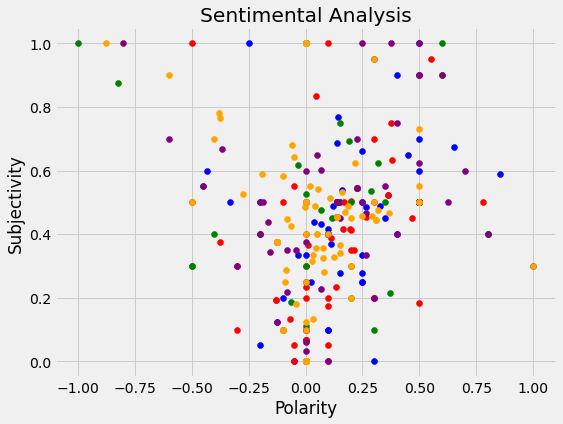

In [71]:
#Plot the Polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df1.shape[0]):
    plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i],color='Blue' )
    
for i in range(0, df2.shape[0]):
    plt.scatter(df2['Polarity'][i],df2['Subjectivity'][i],color='Red' )
    
for i in range(0, df3.shape[0]):
    plt.scatter(df3['Polarity'][i],df3['Subjectivity'][i],color='Green' )
    
for i in range(0, df4.shape[0]):
    plt.scatter(df4['Polarity'][i],df4['Subjectivity'][i],color='Purple' )
    
for i in range(0, df5.shape[0]):
    plt.scatter(df5['Polarity'][i],df5['Subjectivity'][i],color='Orange' )
    
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [25]:
#Get the percentage of positive tweets

ptweets = df1[df1.Analysis== 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df1.shape[0])*100 , 1)

33.0

In [45]:
#Get the percentage of positive tweets

ptweets = df2[df2.Analysis== 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df2.shape[0])*100 , 1)

39.0

In [46]:
#Get the percentage of positive tweets

ptweets = df3[df3.Analysis== 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df3.shape[0])*100 , 1)

29.0

In [47]:
#Get the percentage of positive tweets

ptweets = df4[df4.Analysis== 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df4.shape[0])*100 , 1)

31.0

In [48]:
#Get the percentage of positive tweets

ptweets = df5[df5.Analysis== 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df5.shape[0])*100 , 1)

39.0

In [49]:
#Get the percentage of negative tweets

ntweets = df1[df1.Analysis== 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df1.shape[0])*100 , 1)

10.0

In [50]:
#Get the percentage of negative tweets

ntweets = df2[df2.Analysis== 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df2.shape[0])*100 , 1)

15.0

In [51]:
#Get the percentage of negative tweets

ntweets = df3[df3.Analysis== 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df3.shape[0])*100 , 1)

10.0

In [52]:
#Get the percentage of negative tweets

ntweets = df4[df4.Analysis== 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df4.shape[0])*100 , 1)

15.0

In [53]:
#Get the percentage of negative tweets

ntweets = df5[df5.Analysis== 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df5.shape[0])*100 , 1)

22.0

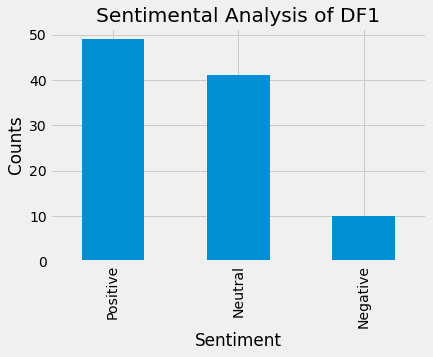

In [83]:
#Show the value counts

df1['Analysis'].value_counts()

#Plot and Visualize the counts
plt.title('Sentimental Analysis of DF1')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df1['Analysis'].value_counts().plot(kind='bar')
plt.show()

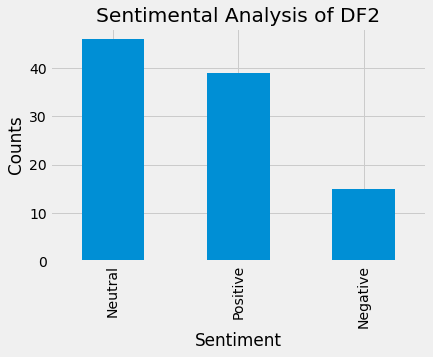

In [84]:
#Show the value counts

df2['Analysis'].value_counts()

#Plot and Visualize the counts
plt.title('Sentimental Analysis of DF2')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df2['Analysis'].value_counts().plot(kind='bar')
plt.show()

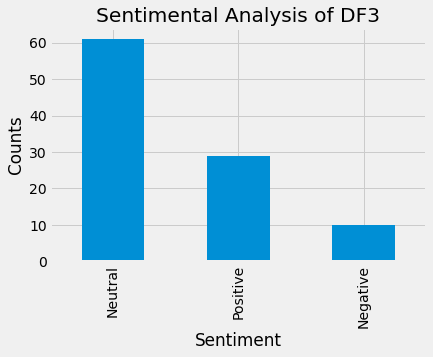

In [87]:
#Show the value counts

df3['Analysis'].value_counts()

#Plot and Visualize the counts
plt.title('Sentimental Analysis of DF3')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df3['Analysis'].value_counts().plot(kind='bar')
plt.show()

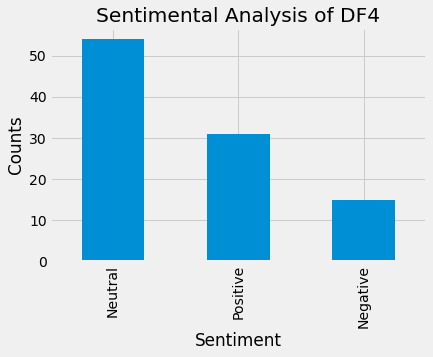

In [86]:
#Show the value counts

df4['Analysis'].value_counts()

#Plot and Visualize the counts
plt.title('Sentimental Analysis of DF4')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df4['Analysis'].value_counts().plot(kind='bar')
plt.show()

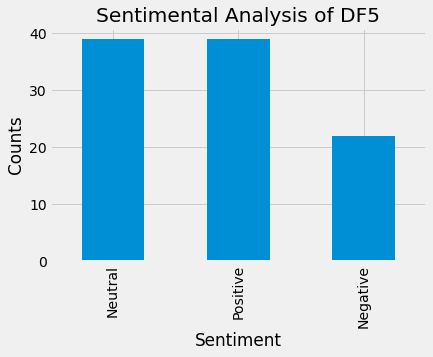

In [85]:
#Show the value counts

df5['Analysis'].value_counts()

#Plot and Visualize the counts
plt.title('Sentimental Analysis of DF5')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df5['Analysis'].value_counts().plot(kind='bar')
plt.show()